In [165]:
import pandas as pd
import numpy as np

In [166]:
# Load the training data
train = pd.read_csv('D:\\DataFrame\\Store Sales - Time Series Forecasting\\train.csv')

# Load the test data
test = pd.read_csv('D:\\DataFrame\\Store Sales - Time Series Forecasting\\test(1).csv')

# Load the stores metadata
stores = pd.read_csv('D:\\DataFrame\\Store Sales - Time Series Forecasting\\stores.csv')

# Load the oil price data
oil = pd.read_csv('D:\\DataFrame\\Store Sales - Time Series Forecasting\\oil.csv')

# Load the holidays and events data
holidays_events = pd.read_csv('D:\\DataFrame\\Store Sales - Time Series Forecasting\\holidays_events.csv')

# Load the transactions data
transactions = pd.read_csv('D:\\DataFrame\\Store Sales - Time Series Forecasting\\transactions.csv')

# Load the sample submission file
sample_submission = pd.read_csv('D:\\DataFrame\\Store Sales - Time Series Forecasting\\sample_submission.csv')


In [167]:
# Preview the datasets
print(train.head())
print("\n")
print(test.head())
print("\n")
print(stores.head())
print("\n")
print(oil.head())
print("\n")
print(holidays_events.head())
print("\n")
print(transactions.head())
print("\n")
print(sample_submission.head())


   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0


   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pich

In [168]:
# Checking missing values in all datasets
print("Train missing values:\n", train.isnull().sum())
print("Test missing values:\n", test.isnull().sum())
print("Stores missing values:\n", stores.isnull().sum())
print("Oil missing values:\n", oil.isnull().sum())
print("Holidays Events missing values:\n", holidays_events.isnull().sum())
print("Transactions missing values:\n", transactions.isnull().sum())


Train missing values:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
Test missing values:
 id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
Stores missing values:
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
Oil missing values:
 date           0
dcoilwtico    43
dtype: int64
Holidays Events missing values:
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
Transactions missing values:
 date            0
store_nbr       0
transactions    0
dtype: int64


In [169]:
# Getting basic statistics
print("Train dataset statistics:\n", train.describe())
print("Oil dataset statistics:\n", oil.describe())
print("Transactions dataset statistics:\n", transactions.describe())


Train dataset statistics:
                  id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02
Oil dataset statistics:
         dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000
Transactions dataset statistics:
           store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.00

In [170]:
# Checking data types
print("Train data types:\n", train.dtypes)
print("Test data types:\n", test.dtypes)
print("Oil data types:\n", oil.dtypes)
print("Holidays Events data types:\n", holidays_events.dtypes)


Train data types:
 id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
Test data types:
 id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object
Oil data types:
 date           object
dcoilwtico    float64
dtype: object
Holidays Events data types:
 date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object


In [171]:
# Unique values in store and family columns
print("Unique stores:", train['store_nbr'].nunique())
print("Unique product families:", train['family'].nunique())


Unique stores: 54
Unique product families: 33


In [172]:
# Convert the 'date' columns to datetime in all datasets
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

# Handle missing values in the oil dataset by forward filling
oil['dcoilwtico'].fillna(method='ffill', inplace=True)

# Confirm changes
oil.isnull().sum()  # Check for any remaining missing values


C:\Users\welcome\AppData\Local\Temp\ipykernel_17580\908902576.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'].fillna(method='ffill', inplace=True)


date          0
dcoilwtico    1
dtype: int64

In [173]:
# Backfill remaining missing values after forward fill
oil['dcoilwtico'].fillna(method='bfill', inplace=True)

# Check if there are any remaining missing values
print(oil.isnull().sum())



date          0
dcoilwtico    0
dtype: int64


C:\Users\welcome\AppData\Local\Temp\ipykernel_17580\1111729029.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'].fillna(method='bfill', inplace=True)


In [174]:
# Merge oil data with train and test datasets on the date
train_merged = pd.merge(train, oil, on='date', how='left')
test_merged = pd.merge(test, oil, on='date', how='left')

# Merge stores data with train and test datasets on the store_nbr
train_merged = pd.merge(train_merged, stores, on='store_nbr', how='left')
test_merged = pd.merge(test_merged, stores, on='store_nbr', how='left')

# Merge holidays_events data with train and test datasets on the date
train_merged = pd.merge(train_merged, holidays_events, on='date', how='left')
test_merged = pd.merge(test_merged, holidays_events, on='date', how='left')

# Merge transactions data with train on both date and store_nbr
train_merged = pd.merge(train_merged, transactions, on=['date', 'store_nbr'], how='left')
test_merged = pd.merge(test_merged, transactions, on=['date', 'store_nbr'], how='left')

# Display the structure of the merged train dataset
print(train_merged.head())


   id       date  store_nbr      family  sales  onpromotion  dcoilwtico  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0       93.14   
1   1 2013-01-01          1   BABY CARE    0.0            0       93.14   
2   2 2013-01-01          1      BEAUTY    0.0            0       93.14   
3   3 2013-01-01          1   BEVERAGES    0.0            0       93.14   
4   4 2013-01-01          1       BOOKS    0.0            0       93.14   

    city      state type_x  cluster   type_y    locale locale_name  \
0  Quito  Pichincha      D       13  Holiday  National     Ecuador   
1  Quito  Pichincha      D       13  Holiday  National     Ecuador   
2  Quito  Pichincha      D       13  Holiday  National     Ecuador   
3  Quito  Pichincha      D       13  Holiday  National     Ecuador   
4  Quito  Pichincha      D       13  Holiday  National     Ecuador   

          description transferred  transactions  
0  Primer dia del ano       False           NaN  
1  Primer dia del ano       

In [175]:
# Convert date column to datetime
train_merged['date'] = pd.to_datetime(train_merged['date'])
test_merged['date'] = pd.to_datetime(test_merged['date'])

# Extract year, month, day, and day of the week
train_merged['year'] = train_merged['date'].dt.year
train_merged['month'] = train_merged['date'].dt.month
train_merged['day'] = train_merged['date'].dt.day
train_merged['dayofweek'] = train_merged['date'].dt.dayofweek

test_merged['year'] = test_merged['date'].dt.year
test_merged['month'] = test_merged['date'].dt.month
test_merged['day'] = test_merged['date'].dt.day
test_merged['dayofweek'] = test_merged['date'].dt.dayofweek


In [176]:
test_merged.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,transactions,year,month,day,dayofweek
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,16,2
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,16,2
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,16,2
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,16,2
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,16,2


In [177]:
# Fill missing transactions with zero
train_merged['transactions'].fillna(0, inplace=True)


In [178]:
# Drop unnecessary columns
train_merged.drop([ 'description', 'transferred'], axis=1, inplace=True)
test_merged.drop([ 'description', 'transferred'], axis=1, inplace=True)


In [179]:
# Rolling sum of promotions over the past 7 and 30 days
train_merged['promo_roll_sum_7'] = train_merged.groupby('store_nbr')['onpromotion'].transform(lambda x: x.rolling(7, min_periods=1).sum())
train_merged['promo_roll_sum_30'] = train_merged.groupby('store_nbr')['onpromotion'].transform(lambda x: x.rolling(30, min_periods=1).sum())

test_merged['promo_roll_sum_7'] = test_merged.groupby('store_nbr')['onpromotion'].transform(lambda x: x.rolling(7, min_periods=1).sum())
test_merged['promo_roll_sum_30'] = test_merged.groupby('store_nbr')['onpromotion'].transform(lambda x: x.rolling(30, min_periods=1).sum())


In [180]:
# Weekend feature (1 if it's a weekend, 0 otherwise)
train_merged['is_weekend'] = train_merged['dayofweek'].apply(lambda x: 1 if x in [5, 6] else 0)
test_merged['is_weekend'] = test_merged['dayofweek'].apply(lambda x: 1 if x in [5, 6] else 0)

# Holiday feature (1 if it's a holiday, 0 otherwise)
train_merged['is_holiday'] = train_merged['type_y'].apply(lambda x: 1 if x == 'Holiday' else 0)
test_merged['is_holiday'] = test_merged['type_y'].apply(lambda x: 1 if x == 'Holiday' else 0)


In [181]:
# Interaction between promotion and weekend
train_merged['promo_weekend_interaction'] = train_merged['onpromotion'] * train_merged['is_weekend']
test_merged['promo_weekend_interaction'] = test_merged['onpromotion'] * test_merged['is_weekend']
test_merged['promo_weekend_interaction'].head()


0    0
1    0
2    0
3    0
4    0
Name: promo_weekend_interaction, dtype: int64

In [182]:

# Step 1: Create interaction terms between store_nbr and family
train_merged['store_family_interaction'] = train_merged['store_nbr'].astype(str) + '_' + train_merged['family']
test_merged['store_family_interaction'] = test_merged['store_nbr'].astype(str) + '_' + test_merged['family']
# Step 1: Create interaction terms between selected features
train_merged['onpromo_promo_sum7_interaction'] = train_merged['onpromotion'].astype(str) + '_' + train_merged['promo_roll_sum_7'].astype(str)
test_merged['onpromo_promo_sum7_interaction'] = test_merged['onpromotion'].astype(str) + '_' + test_merged['promo_roll_sum_7'].astype(str)

train_merged['onpromo_state_interaction'] = train_merged['onpromotion'].astype(str) + '_' + train_merged['state']
test_merged['onpromo_state_interaction'] = test_merged['onpromotion'].astype(str) + '_' + test_merged['state']

train_merged['promo_sum7_state_interaction'] = train_merged['promo_roll_sum_7'].astype(str) + '_' + train_merged['state']
test_merged['promo_sum7_state_interaction'] = test_merged['promo_roll_sum_7'].astype(str) + '_' + test_merged['state']


# Step 2: Drop less important features
train_merged.drop(['is_holiday','locale'], axis=1, inplace=True)
test_merged.drop(['is_holiday','locale'], axis=1, inplace=True)

# Ensure that columns match between training and test sets after encoding
train_merged, test_merged = train_merged.align(test_merged, join='left', axis=1, fill_value=0)


In [183]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['family', 'city', 'state', 'type_x', 'type_y', 'locale_name',
                    'store_family_interaction', 'promo_sum7_state_interaction',
                    'onpromo_state_interaction', 'onpromo_promo_sum7_interaction']

# Apply label encoding to each categorical column in both train and test datasets
for col in categorical_cols:
    # Combine both train and test data for consistent label encoding
    all_data = pd.concat([train_merged[col], test_merged[col]], axis=0)
    
    # Fit the encoder on the combined data
    le.fit(all_data)
    
    # Transform both the train and test sets
    train_merged[col] = le.transform(train_merged[col])
    test_merged[col] = le.transform(test_merged[col])

# Check the transformed train data
print(train_merged.head())

# Check the transformed test data
test_merged.head()


   id       date  store_nbr  family  sales  onpromotion  dcoilwtico  city  \
0   0 2013-01-01          1       0    0.0            0       93.14    18   
1   1 2013-01-01          1       1    0.0            0       93.14    18   
2   2 2013-01-01          1       2    0.0            0       93.14    18   
3   3 2013-01-01          1       3    0.0            0       93.14    18   
4   4 2013-01-01          1       4    0.0            0       93.14    18   

   state  type_x  ...  day  dayofweek  promo_roll_sum_7  promo_roll_sum_30  \
0     12       3  ...    1          1               0.0                0.0   
1     12       3  ...    1          1               0.0                0.0   
2     12       3  ...    1          1               0.0                0.0   
3     12       3  ...    1          1               0.0                0.0   
4     12       3  ...    1          1               0.0                0.0   

   is_weekend  promo_weekend_interaction  store_family_interaction  

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,...,day,dayofweek,promo_roll_sum_7,promo_roll_sum_30,is_weekend,promo_weekend_interaction,store_family_interaction,onpromo_promo_sum7_interaction,onpromo_state_interaction,promo_sum7_state_interaction
0,3000888,2017-08-16,1,0,0,0,46.8,18,12,3,...,16,2,0.0,0.0,0,0,330,0,12,12
1,3000889,2017-08-16,1,1,0,0,46.8,18,12,3,...,16,2,0.0,0.0,0,0,331,0,12,12
2,3000890,2017-08-16,1,2,0,2,46.8,18,12,3,...,16,2,2.0,2.0,0,0,332,10386,1493,1894
3,3000891,2017-08-16,1,3,0,20,46.8,18,12,3,...,16,2,22.0,22.0,0,0,333,7670,1163,2220
4,3000892,2017-08-16,1,4,0,0,46.8,18,12,3,...,16,2,22.0,22.0,0,0,334,141,12,2220


In [184]:
train_merged.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,...,day,dayofweek,promo_roll_sum_7,promo_roll_sum_30,is_weekend,promo_weekend_interaction,store_family_interaction,onpromo_promo_sum7_interaction,onpromo_state_interaction,promo_sum7_state_interaction
0,0,2013-01-01,1,0,0.0,0,93.14,18,12,3,...,1,1,0.0,0.0,0,0,330,0,12,12
1,1,2013-01-01,1,1,0.0,0,93.14,18,12,3,...,1,1,0.0,0.0,0,0,331,0,12,12
2,2,2013-01-01,1,2,0.0,0,93.14,18,12,3,...,1,1,0.0,0.0,0,0,332,0,12,12
3,3,2013-01-01,1,3,0.0,0,93.14,18,12,3,...,1,1,0.0,0.0,0,0,333,0,12,12
4,4,2013-01-01,1,4,0.0,0,93.14,18,12,3,...,1,1,0.0,0.0,0,0,334,0,12,12


In [185]:
# Check the column names of train_merged
print(train_merged.columns)


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type_x', 'cluster', 'type_y',
       'locale_name', 'transactions', 'year', 'month', 'day', 'dayofweek',
       'promo_roll_sum_7', 'promo_roll_sum_30', 'is_weekend',
       'promo_weekend_interaction', 'store_family_interaction',
       'onpromo_promo_sum7_interaction', 'onpromo_state_interaction',
       'promo_sum7_state_interaction'],
      dtype='object')


In [186]:
# Check the columns in train_merged and test_merged
print(train_merged.columns)
print(test_merged.columns)


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type_x', 'cluster', 'type_y',
       'locale_name', 'transactions', 'year', 'month', 'day', 'dayofweek',
       'promo_roll_sum_7', 'promo_roll_sum_30', 'is_weekend',
       'promo_weekend_interaction', 'store_family_interaction',
       'onpromo_promo_sum7_interaction', 'onpromo_state_interaction',
       'promo_sum7_state_interaction'],
      dtype='object')
Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type_x', 'cluster', 'type_y',
       'locale_name', 'transactions', 'year', 'month', 'day', 'dayofweek',
       'promo_roll_sum_7', 'promo_roll_sum_30', 'is_weekend',
       'promo_weekend_interaction', 'store_family_interaction',
       'onpromo_promo_sum7_interaction', 'onpromo_state_interaction',
       'promo_sum7_state_interaction'],
      dtype='object')


In [187]:
# Check columns in train and test data
print("Train columns:", train_merged.columns)
print("Test columns:", test_merged.columns)


Train columns: Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type_x', 'cluster', 'type_y',
       'locale_name', 'transactions', 'year', 'month', 'day', 'dayofweek',
       'promo_roll_sum_7', 'promo_roll_sum_30', 'is_weekend',
       'promo_weekend_interaction', 'store_family_interaction',
       'onpromo_promo_sum7_interaction', 'onpromo_state_interaction',
       'promo_sum7_state_interaction'],
      dtype='object')
Test columns: Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'city', 'state', 'type_x', 'cluster', 'type_y',
       'locale_name', 'transactions', 'year', 'month', 'day', 'dayofweek',
       'promo_roll_sum_7', 'promo_roll_sum_30', 'is_weekend',
       'promo_weekend_interaction', 'store_family_interaction',
       'onpromo_promo_sum7_interaction', 'onpromo_state_interaction',
       'promo_sum7_state_interaction'],
      dtype='object')


In [188]:
# Fill missing values in lag and rolling mean features with median sales
train_merged.fillna(train_merged['sales'].median(), inplace=True)


In [189]:
# Define features and target
X_train = train_merged.drop(['sales','date'], axis=1)
y_train = train_merged['sales']

# Prepare test data (same features as in X_train)
X_test = test_merged.drop(['date','sales'],axis = 1)

# Train a model (e.g., XGBoost)

# Check the dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (3054348, 24)
y_train shape: (3054348,)
X_test shape: (28512, 24)


In [190]:
X_test.columns

Index(['id', 'store_nbr', 'family', 'onpromotion', 'dcoilwtico', 'city',
       'state', 'type_x', 'cluster', 'type_y', 'locale_name', 'transactions',
       'year', 'month', 'day', 'dayofweek', 'promo_roll_sum_7',
       'promo_roll_sum_30', 'is_weekend', 'promo_weekend_interaction',
       'store_family_interaction', 'onpromo_promo_sum7_interaction',
       'onpromo_state_interaction', 'promo_sum7_state_interaction'],
      dtype='object')

In [191]:
# Check for missing values in training and test sets
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 id                                0
store_nbr                         0
family                            0
onpromotion                       0
dcoilwtico                        0
city                              0
state                             0
type_x                            0
cluster                           0
type_y                            0
locale_name                       0
transactions                      0
year                              0
month                             0
day                               0
dayofweek                         0
promo_roll_sum_7                  0
promo_roll_sum_30                 0
is_weekend                        0
promo_weekend_interaction         0
store_family_interaction          0
onpromo_promo_sum7_interaction    0
onpromo_state_interaction         0
promo_sum7_state_interaction      0
dtype: int64
Missing values in X_test:
 id                                    0
store_nbr                   

In [192]:
from sklearn.impute import SimpleImputer

# Drop the 'transactions' column since it's completely missing in the test set
X_train.drop(columns=['transactions'], inplace=True)
X_test.drop(columns=['transactions'], inplace=True)

# Impute missing values in the 'dcoilwtico' column with mean
imputer = SimpleImputer(strategy='mean')
X_train['dcoilwtico'] = imputer.fit_transform(X_train[['dcoilwtico']])
X_test['dcoilwtico'] = imputer.transform(X_test[['dcoilwtico']])

# Check again to ensure no missing values
print("Missing values in X_train after imputation:\n", X_train.isnull().sum())
print("Missing values in X_test after imputation:\n", X_test.isnull().sum())


Missing values in X_train after imputation:
 id                                0
store_nbr                         0
family                            0
onpromotion                       0
dcoilwtico                        0
city                              0
state                             0
type_x                            0
cluster                           0
type_y                            0
locale_name                       0
year                              0
month                             0
day                               0
dayofweek                         0
promo_roll_sum_7                  0
promo_roll_sum_30                 0
is_weekend                        0
promo_weekend_interaction         0
store_family_interaction          0
onpromo_promo_sum7_interaction    0
onpromo_state_interaction         0
promo_sum7_state_interaction      0
dtype: int64
Missing values in X_test after imputation:
 id                                0
store_nbr                         

In [193]:
from sklearn.model_selection import train_test_split

# Split the training data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(f"X_train_split shape: {X_train_split.shape}")
print(f"X_val_split shape: {X_val_split.shape}")


X_train_split shape: (2443478, 23)
X_val_split shape: (610870, 23)


In [194]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)

# Train the model
xg_reg.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = xg_reg.predict(X_val_split)

# Evaluate the model performance
rmse = mean_squared_error(y_val_split, y_val_pred, squared=False)
print(f"Validation RMSE: {rmse}")


Validation RMSE: 520.8365713626206


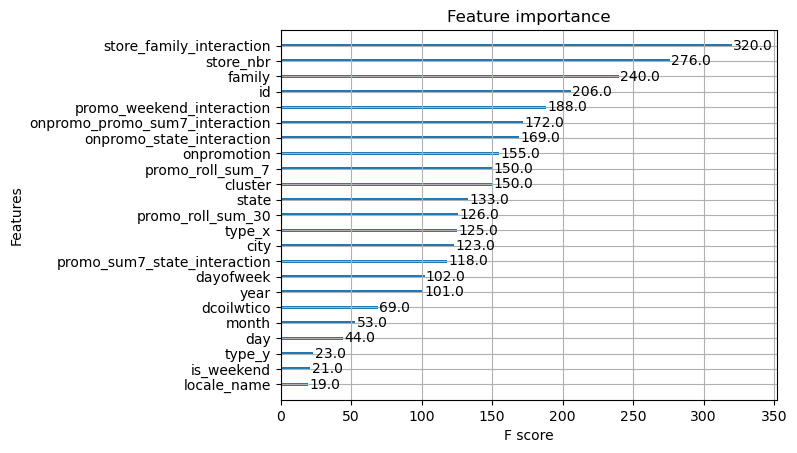

In [195]:
# Plot feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.show()


In [196]:
from sklearn.model_selection import cross_val_score

# Cross-validation to get a more reliable RMSE
cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-cv_scores) ** 0.5
print("Cross-validated RMSE:", rmse_scores.mean())


Cross-validated RMSE: 564.6490912533822


In [198]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300, 500],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7],
}

# Initialize the XGBoost regressor with early stopping
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=10,  # Stop early if validation score doesn't improve
    eval_metric='rmse',
    tree_method='hist',  # Use a more memory-efficient tree method
    verbosity=1
)

# Set up the RandomizedSearchCV with error_score='raise' to catch any NaN issues
random_search = RandomizedSearchCV(
    estimator=xg_reg,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1,  # Use all available cores
    error_score='raise'  # Raise error on fit failure
)

# Fit the random search model with the training data
random_search.fit(X_train_split, y_train_split, 
                  eval_set=[(X_val_split, y_val_split)], 
                  verbose=True)

# Get the best parameters
print(f"Best parameters found: {random_search.best_params_}")

# Use the best estimator to predict on the validation set
best_xg_reg = random_search.best_estimator_
y_val_pred = best_xg_reg.predict(X_val_split)

# Calculate RMSE
rmse = mean_squared_error(y_val_split, y_val_pred, squared=False)
print(f"Validation RMSE after tuning: {rmse}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[0]	validation_0-rmse:1048.99727
[1]	validation_0-rmse:1006.84731
[2]	validation_0-rmse:967.25888
[3]	validation_0-rmse:929.93732
[4]	validation_0-rmse:894.69120
[5]	validation_0-rmse:861.46323
[6]	validation_0-rmse:829.73824
[7]	validation_0-rmse:800.16574
[8]	validation_0-rmse:772.07463
[9]	validation_0-rmse:745.95567
[10]	validation_0-rmse:721.06591
[11]	validation_0-rmse:698.04470
[12]	validation_0-rmse:676.46804
[13]	validation_0-rmse:656.02715
[14]	validation_0-rmse:637.16926
[15]	validation_0-rmse:619.36033
[16]	validation_0-rmse:602.38770
[17]	validation_0-rmse:586.19732
[18]	validation_0-rmse:571.19744
[19]	validation_0-rmse:557.19229
[20]	validation_0-rmse:544.22084
[21]	validation_0-rmse:532.11801
[22]	validation_0-rmse:520.63570
[23]	validation_0-rmse:510.01417
[24]	validation_0-rmse:500.11638
[25]	validation_0-rmse:490.77333
[26]	validation_0-rmse:481.85962
[27]	validation_0-rmse:473.60483
[28]	validation_0-rmse

In [203]:
# Ensure the test set does not have the 'sales' column


# Make predictions on the test set
test_preds = best_xg_reg.predict(X_test)

# Load the test set ids (assuming 'id' is a column in the test data)
test_ids = X_test['id']

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'id': test_ids,
    'sales': test_preds
})

# Ensure no negative sales (optional, as per competition guidelines)
submission_df['sales'] = submission_df['sales'].clip(0)

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv')

print("Submission file created successfully!")




Submission file created successfully!
